# Neural Networks
----
Micrograd: Autograd: automatic engine, implements backpropagation.

Backpropagation: is an algorithm that allows you to efficiently evaluate the gradient of a loss function with respect to weights of the NN.

That allows us to we can iteratively tune the weight of network to minimize the loss function and therefore improve the accuracy of the network.

Backpropagation could be at the mathematical core of any modern deep neural libraries. like Pytorch or jax.

**NN:** just a mathematical expressions, they take the input data as input and weights of a neural networks as a input and mathematical expression. And output is your predictions of your NN or loss function

# 1st Good understanding is what derivative is and what information it gives you .


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## defining a scaler valued function f(x)

def f(x):
  ## takes single scaler x and returns single scaler y
  return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

Thats for only one value x.

we can draw a parabola with multiple valuees.

let say get value from -5 to 5
and get its y values and plot.

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]


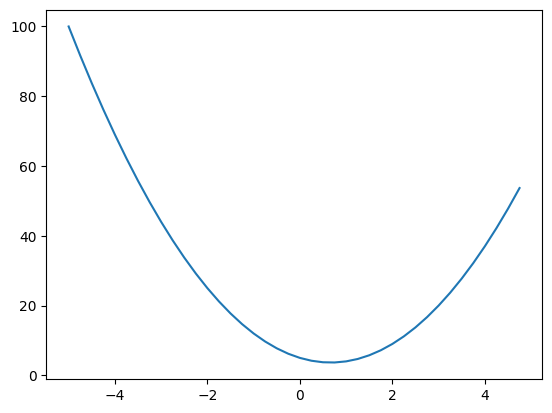

In [4]:
xs = np.arange(-5,5,0.25)
print(xs)
ys = f(xs)
plt.plot(xs,ys)

As we can see if we give 3.0 as x and it will give us y as 20, can be seen on graph

Now Think what is the derivative of function `f(x)` at any single input `x`. derivative of function at different point of `x`.

In school we would do all the calculations on the paper and derive the equation and then pass all the x values to get derivatives.

But here we are not going to do that because no one in neural networks writes out expressions for the NN. It would be tens of thousands of terms that derives the derivative.

Instead of symbolic aproach we have to understand what derivative(defination of derivative) is and understand what derivative is measuring, what it is telling you about the function

---

## Derivative of a function f(x)

$$ L = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h} $$

What it is saying is that if you slightly bump up the, you are at some point `x` you are intrested in, and if you slightly bumpup `x` by small number `h`, how does the function respond, what is the slope at that point, does the function go up or down and by how much. the slope of that function or responce at that point.


So we can evaluate derivative here numerically by taking the a very small `h`




Take

refere graph with x its corresponding y values
```py
h = 0.0001
x = 3.0

f(x) # output will be 20

# so doing f(x + h) will it be greater than 20 or will be down?

f(x + h) # 20.001400030

## the value is slightly up

## how much function responded?
f(x+h) - f(x) # 0.0014000300000063248 function responded in a positive direction


# then normalize by the run, so rize over run to get slope
(f(x + h) - f(x))/h # 14.000300000063248
```

Here we have to take `h`'s value very very small amount to get the exsect value.

so at `x = 3` the slope is `14`

### slope at `x = -3`?

telling exact value is hard but what will be the sign of the value?

from the graph try to ans.

so for -3 if we go slightly in a positive direction then function will go down.

we will get slightly below 20.

```py
h = 0.0001
x = -3.0

f(x) # output will be 44.0

# so doing f(x + h) will it be greater than 40.0 or will be down?

f(x + h) # 43.99780002999999, value decreased

## the value is slightly down

## how much function responded?
f(x+h) - f(x) # -0.0021999700000066014 function responded in a negative direction


# then normalize by the run, so rize over run to get slope
(f(x + h) - f(x))/h # -21.999700000066014
```

> 💡 and some point at graph the **slope will be `0`** like at x = 2/3

In [5]:
h = 0.0001
x = -3.0
# f(x)
(f(x + h) - f(x))/h

-21.999700000066014

## Explaination of below code

function of 3 scaler input a, b, and c as ouput as d
`d = a*b+c`

a = 2.0

b = -3.0

c = 10.0

3 inputs to our expression graph and single o/p `d`

printing `d` we get `4.0` as o/p

⛳️ we want to take derivative of `d` with respect to `a`, `b`, and `c`. and thinking what derivative is telling

In [6]:
# more complex example
a = 2.0
b = -3.0
c = 10.0

d = a*b+c # function of three scaler inputs a,b, and c with output as d
print(d)

4.0


1st taking derivative of `d1` wrt `a`

In [7]:
h = 0.0001 # taking small h

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c

c += h

d2 = a*b+c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


NNs are prety massive math expressions so we need some data structures that maintain these expressions.

Let's start to build out

In [68]:
class Value():

  def __init__(self, data, _children=(), _op='', label=''):
    """
    @params:
    data: actual value
    _children: default empty tuple,
    """
    self.data = data
    self.grad = 0.0 # initially it will be zero
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other) # for ValueObject + constant eg. a + 1
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad # += to accumulate gradient in all backward
      other.grad += 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "allowing int or float as of now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
      self.grad +=  other * (self.data**(other-1)) * out.grad # der of the power
    out._backward = _backward
    return out

  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self):
    return self * -1

  def __sub__(self, other):
    return self + (-other)

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad # tanh's local derivative * out.grad
    out._backward = _backward
    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self,),'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    return out

  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)

    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


In [72]:
a = Value(2.0)
b = Value(2.0)

In [73]:
a - b

Value(data=0.0)

In [61]:
a / b

Value(data=0.5)

In [9]:
a = Value(10, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
# a*b+c

e = a*b; e.label='e'
d = e + c; d.label='d'
d
# (a.__mul__(b)).__add__(c)

# making this one layer deeper
f = Value(-2.0, label='f')

L = d * f; L.label = 'L' #output of d*f
L

Value(data=40.0)

Now the missing thing is connectin of this expression. we need to keep expression graph.

we need to know and keep pointers about what values produces what other values.

for that we introduce new variable `children` in `Value` class

by default `_children` will be `empty set`.

and creating a `_prev` variable which is `set of _children`

and when doing `multiplication` and `addition` operations pass `self and other` as child.

```py
a = Value(10)
b = Value(-3.0)
c = Value(10.0)
d = a*b+c
# now we can see d's childs
d._prev
```

now we can get a child of d using `d._prev`

Now we can get child but we don't know which operation did it performed. For that add onethore param `_op` by default empty.

In [10]:
# a = Value(10)
# b = Value(-3.0)
# c = Value(10.0)
# d = a*b+c
# # now we can see d's childs
# d._prev

In [11]:
d._op # now we have d._op for operation
# this tells d was produced by addition of those two values

'+'

In [12]:
from graphviz import Digraph

def trace(root):
  # build a set of  all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges


def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir':'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectengular ("record") node for it
    dot.node(name=uid, label="{ %s | data %.4f | grad %.4f}" % (n.label,n.data, n.grad,), shape='record')
    if n._op:
      # if this value is result of some operation, create an op node for it
      dot.node(name=uid+n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to output node n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

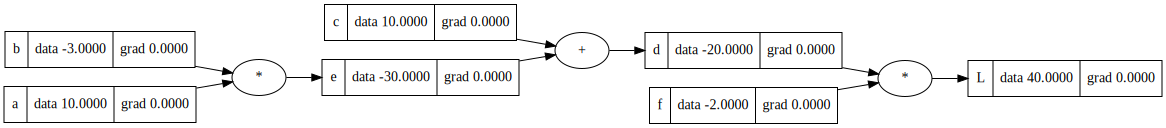

In [13]:
draw_dot(L)

## 📍 Important notes, Read again and rewrite clearly

Above image or process shows forward pass

givving multiple inputs and getting single output L

and output of the forward pass is L = 40.0

Now, next we would like to run backpropagation

In back P, we start from the end L and reverse and calculate the gradient along all these intermediate values.

and we have to derive a derivative of L with respect to all the parameters

calculating derivative of L wrt f, d , c, e, b, and a

> ✅ We would be very intrested in the derivative of loss function L with respect to weights of a neural networs

Some of these labes represents the weights of the NN

So, we will need to know how those weights are impacting the loss function

so we are interesting in. dereivative of output wrt some of its leaf nodes, and those leaf nodes will be the weights of the neural nets.

other leaf nodes are the data itself, But we will not use the derivative of loss function wrt data beacause the data is fixed, but the weights will be iterating on using gradient information

# 📍Important -> creating a variable inside a Value class

that maintains the derivative of L WRT that value, call this variable `grad`

# Manual Back propagation

- `grad` variable representing gradient of L WRT each label

so for `L` how much does `L` change? it changes by `h`. so derivative or `L` WRT `L` would be `1`.

We can measure this with numerics as well.

L.grad = 1.0

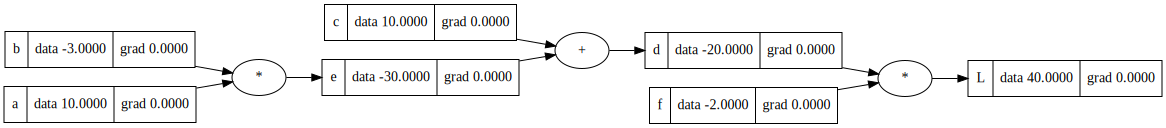

In [14]:
# to draw ndoes
draw_dot(L)

In [15]:
# L = d * f

# dL/dd = ? f

# (f(x + h)-f(x))/h

# ((d+h)*f - d*f) / h
# (d*f + f*h - d*f) / h
# (f*h) / h
# f

## (*) node

dL/dd = f and dL/df = d

double chack by bumping up that variable by h in below method

so dL/dd = value of `f`
and dL/df = value of `d`


1. dL/dd
2. dL/df
3. dL/de
4. dL/dc
5. dL/da
6. dL/db

In [16]:
L.grad = 1.0

In [17]:
d.grad = -2.0
f.grad = -20.0

Doing kind of inline gradient check.

## Gradient check
when we deriveing backpropagation and getting derivative WRT all the intermediate results. and numerical gradient is just estimating using small step size `h`

## 📍 Now understand **CRUX** of the backpropagation, The most important node to understand (+) node

> 💡  If you understand gradient for this node then you understand all backpropagation and all training of neural nets.

**Need to derive dL/dc (derivative of L wrt c)**

we have already computed gradient for other d and f params. and continuing the backpropagation manually

so we want dL/dc and also dL/de

**✍️NOTE: For intuision look at the diagra**

**problem:** How do we derive dL/dc?
- we know dL/dd, we know how `L` is sensitive to `d`
- but how is `L` sensitive to `c` ?
- so, we know dL/dd, and we also know how `c` impacts `d`.
- intuatively if you know the impact that `c` is having on `d` and impact that `d` is having on `L`.
- Then we should be shomehow able to putting them together to figure out how `c` impacts `L`.

so let's look at **what is dd/dc?**

dd/dc = ?

we know function(equation of) of d

d = c + e

if you know calculas and remember, diferentiating `c + e` WRT `c`, that gives `1.0`.

and we can go to basics and derive it by bumping it up by value h

(f(x+h)-f(x))/h

((c+h+e)-(c+e))/h    here c+e c+e got cancel out and left with h. and h/h = 1

(c + h + e - c - e))/h

h/h = 1

so,

dd/dc = 1.0 and by this

dd/de = 1.0

- so derivative of (+)sum expression is very simple.
- and this is the local derivative.
- calling it local derivative because we have the final o/p value at all the way at the end of the graph.
- and now we are like a small node(+) here. and (+) node doesn't know anything about the rest of the graph that's embedded in.
- all it knows is that it did plus(+). it took `c` and `e` and added them and created `d`. and (+) node also knows the local influence of c on d or rathare dd/dc and also knows dd/de.
- But that's not just that we want. That's just a local derivative.
- What we actualy want is dL/dc.
- L is just one step away here. but in general case this plus node could be embedded in like a massive graph.


- so we know how d impacts l, and how c and e impacts d how do we put that information together to write dL/dc and the **ans is THE CHAIN RULE.** in calculas

# The Chain Rule

Refere: [link](https://youtu.be/H-ybCx8gt-8?si=boPU0WpoXRmFdtl7)

$$ \frac{dz}{dx} = \frac{dz}{dy} . \frac{dy}{dx}, $$

Fundamentally it's telling you how we chain these derivatives together correctly.

to differentiate through a function composition we have to apply multiplication of those derivatives

> Intuitively, the chain rule states that knowing the instantaneous rate of change of z relative to y and that of y relative to x allows one to calculate the instantaneous rate of change of z relative to x as the product of the two rates of change. [Wikipedia].


so to do this we multiply derivatives

WANT:

dL/dc = ( dL/dd) * (dd/dc). # chain rule

KNOW:

dL/dd

dd/dc

- because local derivative dd/dc is 1 we just copy over the dL/dc * 1

- because dL/dd is -2.000 what is dL/dc? its local gradient(1.0) times dL/dd.
  which is -2.0

So what a + node does is litrely just routes the gradient beacause the pluse node's local derivative is just 1 . so in chain rule 1 times dL/dd is just dL/dd.

so derivative just gets routed to both c and e

In [18]:
e.grad = -2.0
c.grad = -2.0

Now finally we left with last two parameters a and b which is multiplication node.

and we have already discussed about so apply chain rule and get output.

e = a * b

loca derivative de/da = b and de/db = a

so

dL/da = dL/de (we already know)* de/da

dL/da = -2.0 * -3.0  = 6

and

dL/db = -2.0 * 10.0 = -20.0


In [19]:
a.grad = 6.0
b.grad = -20.0

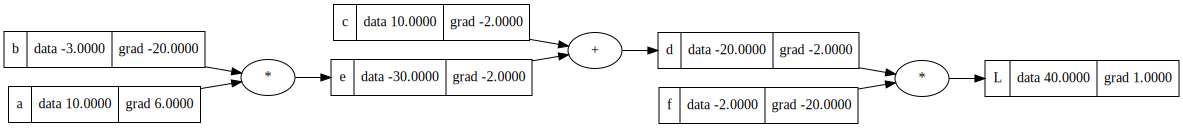

In [20]:
draw_dot(L)

In [21]:
-2.0 * 10.0

-20.0

In [22]:
def lol():
  h = 0.0001 # increasing any parameter by the small amount of h
  # whatever parameter we will add h(bump up by h) then it prints output as dL WRT that parameter.

  a = Value(10, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label='e'
  d = e + c; d.label='d'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(10, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label='e'
  d = e + c; d.label='d'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h) # rise over run

lol()

0.0


So, That is the manual backpropagation, all the way from L(loss/output node) to leaf node. and done it peice by pice.

All we done is we iterated from all the node one by one and locally apply the chain rule. we always know the derivative of L WRT this little output and we look at how this output is produced, this output is produced through some operation and we have some pointers to the children node of this operation. and in this little operation we know what the local derivatives are and we just multiply them on to the derivative always. so we go through recursively multiply on the local derivatives and that's what backpropagation is.

its just a recursive application of chain rule through computaion graph.

Let;s see the power in action

a.data change it, if you want L to go up that means we just have to goto the direction of the gradient.

change all the leaf node only not the expression one.

if we nudge in direction of gradient we expact positive influence on L

so we expact L to go UP positively, so it should become less negative. it should go up to say -6 or something like that

> 💡 These gradients give us some power, because know how to influence the final outcome. And this is usefull to train neural nets

In [23]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

#rewrite the forward pass

e = a*b
d = e + c
# f will remain unchanged
L = d * f;

print(L.data)

48.866400000000006


# One more example of backpropagation using bit more complex and useful example

## Goal
Backpropagate through a single neuron.

## Notes

We evantually want to build out neural networs. and in simpler case it is multilayer perceptrons

![](https://cs231n.github.io/assets/nn1/neural_net2.jpeg)

That's the image of two layer Neural Nets. It has got two hidden layers made up of neurons. And these neurons are fully connected to each other.


![](https://cs231n.github.io/assets/nn1/neuron.png)
Above image of the biological neuron. And its very complicated devices.

But we have very simple mathemetical models of them.

Below 👇 is the image of simple mathemetical model of the neuron.

![](https://cs231n.github.io/assets/nn1/neuron_model.jpeg)

- it hase some input `x`'s (x).
- and synapsis that have weights on them. `w`s are weights.
- And these synaps interect multiplicatively with input.
- So, what flows to the cell body of this neuron is `w*x` (w times x).
- There's multiple inputs. so, there's many time `w * x`'s flowing to the cell body.
- the cell body also has some bias `b`. This is sortof triggers happiness of neuron. so this bias can make it a bit more trigger happy or bit less trigger happy regardless of the input.

Broadly we are taking all the `w * x` of all the inputs adding the bias `b` and then we take it through an activation function.

**Activation Function** : is like somekind of squashing function like sigmoid, or tanh or something like that.

In this example we are using `tanh`


### Tanh Activation Function

As you can see the inputs as they come in gets squashed on the `y` cordinate.

converting all range of inputs to -1 to 1

 - right at `0` we will exactly get `0`.
 - And then you go more positive in the input then you will see that function will only go up to `1` and then plateau out  ?.
 - meaning if you pass very positive input we are gonna cap it smoothly at positive one 1.
 - And on negative side we will cap it smoothly to -1 negative one
 - So, that's the squashing/ activation function applied to the dot product of the weights and the inputs.

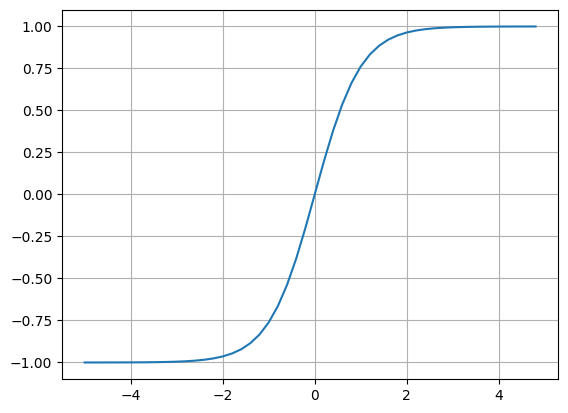

In [24]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [25]:
# inputs x1, x2   2D neuron, so two inputs are gonna comin
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# weights of neuron w1, w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias of the neuron
b = Value(6.8813, label="b")

# (x1*w1) + (x2*w2) + b
x1w1 = x1 * w1; x1w1.label = "x1w1";
x2w2 = x2 * w2; x2w2.label = "x2w2";

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1x2w2";

n = x1w1x2w2 + b; n.label="n"; # its row body of cell without activation function. this is the part of sum+bias in the neuron

# draw_dot(n) # draw the diagram before tanh

# Now let's use tanh so that we can produce the final output

# o here is output, want output from tanh
o = n.tanh(); o.label = 'o' # now we can do these and thats going to return tanhd output of n
# draw_dot(o)
# 1. we haven;t yet written tanh
# now should be able to draww o not n

Reason to build a `tanh` function in our Value Class.
 Its hyperbolic function, and we have only inmplemented so far plus and multiplication. and it can't make it tanh out of + and *. we also need exponentials.

 From the figure we can see that tanh involves exponentials and we havent yet implemented it yet.

 $$ tanh \; x = \frac{sinh \; x}{cosh \; x} = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} + 1}. $$

 We can make use of either one of these equeations. So as we not gonna be able to produce tanh because we havent implemented it. so go backup and implement it in a `Value` node.

 1 option:

 - implement exp function and can return exp of tanh value
 - bcs if we have exp function then we have implemented everything else that we need like add, mul, etc.

 Purpose:
 we just dont necceessarly need  to have the most atomic piceses in the `Value` object. we can create a functions at arbitrary point of abstractions. they can be complicated functions or they can be very simple functions like a plus. Its totally up to us.

 The only thing that matters is that we know how to differenciate through any one function. so we take some input and make some output. the only thing that matters is it can be arbitarily complex function as long as you know how to create a local derivative. If you know the local derivative of how the inputs impact the output then that's all you need.

 So instead of making `exp()` atomic function, we will cluster up all of the above shown expression and not gonna breack it down to its atomic pieces. just directly implementing the `tanh()`


 #### After implementation of tanh
 now tanh is a micrograd supported node.
 as long as we know derivative of `tanh` then we will be able to backpropagate through it.

 currently its not quashing too much of bias input as 6.7.


 if bias increase to 8. we can see the input to the tanh is now 2 and tanh is quashing it to 0.96. so already hiting the tail of the tanh and it will smoothly go upto 1 and plateau out over there.

 changing this bias from 8 to 6.88 for specific reasons like from backpropagation numbers comeout nice so that we can understand

 ## Back P
 - now goint to do backpropagation and filling all the gradients.
 - so whats is the derivative of `o` wrt all the inputs here.
 - in tipical nn setting we only care about the most is the derivative on the weights specifically w2, and w1.
 - bcs those are the weights that we are goint to optimize as part of backpropagation.
 - Other thing to keep in mind is that we have here is only single neuron. But in the neural net, they have many neurons and they are connected.
 - so this is like a small neuron a piece of a much bigger puzzle.
 - and evantually there's a loss function that measures the accuracy of neural net and we're backpropagating wrt that accuracy and trying to increase that.




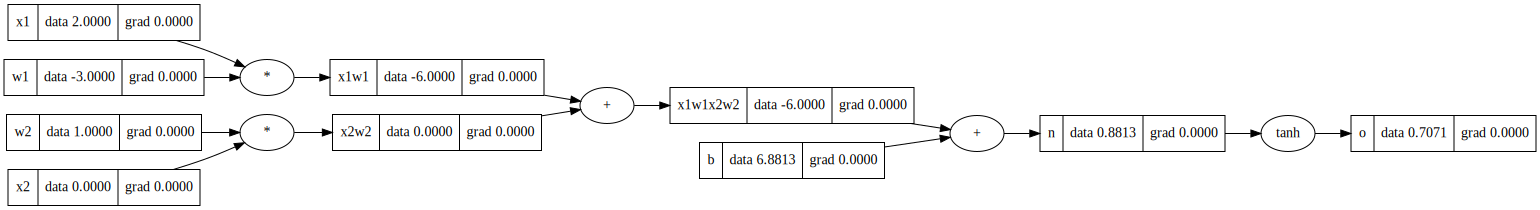

In [26]:
draw_dot(o)

What is the der of `o` wrt `o`, the base case the gradient is just 1.0

 now backpropagate through tanh

 to backpropagate through tanh we need to know local derivative of tanh

 o = tanh(n)

 do/dn = ??

 we can calculate derivative manualy of the above given equation of `tanh`. or just use the below given equation for getting derivative of `tanh` from wikipidia.

 $$ \frac{d}{dx} tanh \; x = 1 - tanh^2x $$

 this is just 1 minus tanh(x)^2

 do/dn = 1 - tanh(n)**2

 so fill n's gradient

 then comes `+` node. and from previous we know it just distributes the gradients bcs local derivative of every node is 1

 and again we have + node so continueing distributing the gradient.


In [27]:
n.grad = 0.5

In [28]:
o.grad = 1.0
# now backpropagate through tanh
# to backpropagate through tanh we need to know local derivative of tanh

# o = tanh(n)
# do/dn = ??



In [29]:
# o = tanh(n)
# do/dn = 1 - tanh(n)**2   or 1 - o**2
1 - o.data**2 # 0.5

0.5000520352341944

In [30]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [31]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [32]:
x2.grad = w2.data * x2w2.grad # that's the global pice of chain rule
w2.grad = x2.data * x2w2.grad

As you can see the gradient on our weight `w2` is `0.0` because `x2`'s data was `0.0`. and `x2` will have gradient `0.5` as `w2.data` is `1.0`.

derivative always tells us the influence of weight on the final output. If I wiggle `w2` how is the output changing? its not changing because we are multiplying it with `0` and because its not changing there is no derivative. and `0` is the correct answer.

same way do it for x1 and w1

In [33]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

So `x1`'s grad will be `-1.5` and `w1` will be `1.0`.

so if we want these neurons output to increase.
`w2` doesnt matter as of now as its gradient is `0`. so `w1` weight should go up then these neuron output will go up and proportionally because the gradient is `1.0`


Doing the backpropagation manually is obvausly ridiculas.

Now implementing backward pass automaticaly and not going to do it manually.

### Implementing automatic backward pass

- starting it by doing self._backward.
- this will be a function which is going to do a little pice of chain rule.
- at each little node that compute that took input and produced output.
- we are going to store how we are going to chain outputs gradients into the input gradients.
- so by default this will be a function that doesn't do anything. and that would be the case for the leaf node. there's nothing to do with leaf node.

## backward() in add

- `out` values are an addition of `self` and `other`.
- `out._backward = _backward` is the function that propagates the gradient.
- now define the function what it should do.
- its job is to take `out's` grad and propagate it to `self` and `other's` grad.
- as we shaw how the chain rule works. take the local derivative times the global derivative (which is the derivative of the final output of the expression wrt out's data).
- so local derivative of self is 1.0 in addition operatino times `out.grad`.
- and `others.grad = 1.0 * out.grad`.
- later will call this function to propagate the gradient


## backaward for mul(*)
- same way for multiplication
- in backward function.
- `self.grad = other.data * out.grad` and `other.grad = self.data * out.grad`

and same way for `tanh`
- in tanh's backward function there's local derivative of tanh and out.grad

That's it, now test time.



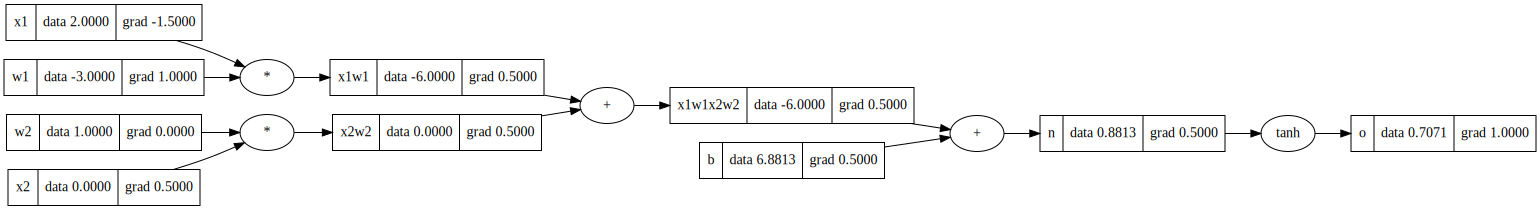

In [34]:
# redefine the parameters values first
# then do draw_dot(o) to see that all grads are set to 0
draw_dot(o)

In [35]:
# now we dont have to do backpropagation manually anymore
# we are basicaly be calling .backward in the right order
# 1st call the o.backward

# so o was the outcome of the tanh
# calling o._backward() be _backward() function inside tanh() function

# 📍 IMPORTANT
# THINGS TO NOTE: bcs local derivative times(*) out.grad. and out.grad is initialized to 0.0
# so as a base case we need to set o.grad to 1.0. To initialize it with 1

o.grad = 1.0
# once this is 1 we can call o._backward


In [36]:
o._backward()
# so waht it shoud do is propagate the o's grad thruogh the tanh
# local * global derivative
# n's grad should be now 0.5 🔥

In [37]:
# now call n._backward()
n._backward()

In [38]:
b._backward()
# NOTE ✏️ 📍
# b is a leaf node and b's backward is by initialization the empty function, so nothing will be called.

In [39]:
x1w1x2w2._backward()

In [40]:
x2w2._backward()

In [41]:
x1w1._backward()

so we get values as exactly as before. But now we done it through the backward function.

Now one last pice to get read off which is calling _backward function manually.

## why topological sort?

Think what we did actually.
1st we layedown the mathematical expression and trying to go backward through that expression.

going backward through expression means we never want to call ._backward for any node before anything we have done everything after it.

we have to get all its full dependencies, like from graph its right to left.

so this ordering of graph can be achieved through something called topological sort.

Topological sort: arrengement of a graph such that all the edges go only from left to right. given DAG we get ordering such that all the edges go only one way left to right.

implementation of topological sort

### Explaination of topological sort code
- It builds the topological graph
- maintain visited nodes
- then going through starting at some root node, in our case its `o`.
- and starting with `o` it goes through all of its children and lay them out from left to right.

- starts with `o`, if its not visited, mark as visited, then it iterates through all its children and calls topological sort on them, and after visiting all its children it adds itself

In [42]:
# this builds the topological graph
topo = []
visited = set() # maintaining set of visited nodes
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v) # add after all of its child is added/procesed

build_topo(o) # build topo on o
topo # see the list

[Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.8813),
 Value(data=0.8813000000000004),
 Value(data=0.7070699857622339)]

in above result the last elemet is `o`, and second last is `n` and so on.

so what we are doing is calling ._backward in all of nodes in topological order.

reset the gradients to set 0.

then start by setting o.grad = 1.0, thats base case.
then build the topological order, and then for node in reversed of topo. reverse order because the topo list goes from leaf to root but here we want to calculate from root which is `o` so thats why in reverse order.



In [43]:
o.grad = 1.0

topo = []
visited = set() # maintaining set of visited nodes
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v) # add after all of its child is added/procesed

build_topo(o) # build topo on o
topo #

for node in reversed(topo):
  node._backward()

Finally hide this functionality inside the Value class. So instead of _backward defining actual backward function


# Explaination of backward function
- this is the actual backward function without the underscore(_)
- first build a topological graph starting at self.
- so build_topo(self) will populate topological order into the `topo` list which is local variable.
- then set self.grad to 1.0
- and then each node in reversed list, starting at last and all the children.
thats it.

now reset parameters and set grad to 0.

and now `o.backward()` without the underscore and see the results 🔥🔥🔥😃✨


In [44]:
o.backward()

So that's a backpropagation of a single neuron.

## Bug in Value class

**Description**: There's some specific conditions where we have to think about.

Here's simpel case of a bug.

create a single node `a`. then create a `b` that's `a+a`. then called `backward()`

```py
a = Value(3.0, label='a')
b = a + a; b.label='b'
b.backward()
draw_dot(b)

```

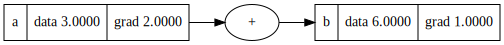

In [45]:
a = Value(3.0, label='a')
b = a + a; b.label='b'
b.backward()
draw_dot(b)

**Description of above graph**

So `a` is `3` and `b` is `a+a`. so there's two arrows on top of each other. `b` is `a+a` which is `6` so forward pass works but the problem is the gradient is not correct that we calculated automatically by calling backward() function.

So by calculating the derivative of `b` wrt `a` which is `2`. but its showing `1`.

See what backward() dose.

`b` is the result of addition and its `a+a` that is `self + other` and both are same object `a`.

and then we called backward(), so it sets self.grad to 1 and then other.grad to 1.

but because we are doing `a+a` self and other are the same object and its just overriding the gradient value. setting it to 1 again and again that's why it stays at 1. So that's problem. we will get into issue everytime we use the variable more than once. in earlier example every variable used exactly once so, we didn't see the issue.

**Solution**

look at multivariate chain rule. Its just that we accumulate these gradients. these gradients add.

so, instead of setting those gradients(`=`) we can do `+=`. need to acumulate those gradients. and it will work because we are initializing them with 0.

so it starts with 0 and then any contribution that flows backwards will simply add.

see by redefining the above equations a's gradients should be 2 now.

## Takeaway

If the variable are used multiple time in network then it must add gradient of each operation or accumulate but our Value class was overriting the previous values instead of adding gradient with its previous value. so changed it with `+=`

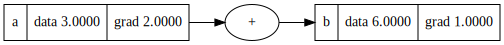

In [46]:
a = Value(3.0, label='a')
b = a + a; b.label='b'
b.backward()
draw_dot(b)

## Breaking Down tanh function into explicite atom

- we can break down the tanh function similar to other add and mul operation and have their derivatives and get the same result.

As this is the tanh

 $$ tanh \; x = \frac{sinh \; x}{cosh \; x} = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} + 1}. $$.

 - and I did implemented tanh as a single function in the Value class. and we can do that because we know it's derivative and can backpropagate thorough it.
 - But we can also break down tanh into and express it as function of x. and we can get the same result and gradients.
 - It forces us to implement a few more expressions like exponentiation, addition, subtraction, division, etc. And its good excercise to implement few more of these.


 **1. can't do Value(a) + 1**

 - we can do addition of value object with constant like
 ```py
 a = Value(2.0)
 a+1 # will rais error
 ```
 - as in tanh we add and substract with constant 1 so we need this feature.
 - can't add constant 1 with object a. bcs as of now it only allows addition of two objects.
 - values will go into self and others. self is a object and other is a 1. and there's no `1.data`. `1` is not a value object.
 - for convinence we can create expressions like this.

 Solution: check if other is instance of value class if not create other to value object.

 ```py
 other = other if isinstance(other, Value) else Value(other)
 ```

 - Now do the same thing for multiply.

In [47]:
a = Value(2.0)
a+1 # will rais error. can't add constant 1 with object a. bcs as of now it only allows addition of two objects.

Value(data=3.0)

In [48]:
a = Value(2.0)
a+1 # now this will work

Value(data=3.0)

In [49]:
a*2

Value(data=4.0)


 **2. can't do 1 * Value(2.0)**
 - we can do `a + 1 or a * 1`. assume `a` is a Value object.
 - but we can't do `1 + a or 1 * a`.

 for `a+1` it calls `a.__add__(1)`

 but for `1+a` it can't `1.__add__(a)` there no such thing.


 **Solution**

 - in python we're free to define something called `__rmul__`.
 - and rmul is kind of like fallback.
 - if pyhton can'd do `2*a` it will check if by chance `a` knows how to multiply `2`.
 - and that will be called into `rmul`
 - and rmul will call `a * 2` and that will work
 - so `2*a` will redirect to `rmul` and `rmul` will call `a*2`. redefining with `rmul`


In [50]:
2*a

Value(data=4.0)

- Now look at the other expressions that we need.
- we need to know how to exponentiate and how to divide.

### 1st Exponentiation

- defining single function `exp`
- mirroring tanh function its a simple function that transform a single scaler value and output a single scaler value.
- poppign out the number from value object and then applying math.exp and creating its value object.

- Triky part: how to backpropagate through e^x.
- Its derivation is the function itself. so output data * out.grad goes into _backward function.


In [51]:
a = Value(2.0)
a.exp()

Value(data=7.38905609893065)

So forward pass works! in exp and hopefuly backward as well.

## Lastly Divide operation.
- People implement something more powerful than a division.
- bcs division is the speacial case of something a bit more powerful.

Here we would like to do following operation.
```py

a = Value(10.0)
b = Value(2.0)
a / b # will give error as we haven't implemented yet
```

In [62]:
a = Value(10.0)
b = Value(2.0)
a / b

Value(data=5.0)

Value(data=0.3333333333333333)

 following 3 instructions will work sameway division.

 a / b

 a * (1/b)

 a * (b**-1)

 these three expressions will give the same result

 x ** k

 here we want to implement x to the k for some constant int or float
 and would like to differentiate this
 and -1 is the special case for the division.
 reason to do this is that its more general.

 so redefining division operation
 we can redefine the division using following

```py
  def _truediv__(self, other): # self / other
    return self * other**-1
```

## Pow
- so in division we used `other**-1` power operation so here we also need to redefine that and its derivation _backward stub.

- so we need to implement `__pow__` function
- So now forward pass works
- but still have to check for backward pass

## Subtract

We also have to implement subtract

withowt that `a-b` wont work.
- implemented by addition of negation.
- and for negetion, multiply by -1
- and using the stuff that we already build

In [74]:
a-b


Value(data=0.0)

In [76]:
# inputs x1, x2   2D neuron, so two inputs are gonna comin
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# weights of neuron w1, w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias of the neuron
b = Value(6.8813, label="b")

# (x1*w1) + (x2*w2) + b
x1w1 = x1 * w1; x1w1.label = "x1w1";
x2w2 = x2 * w2; x2w2.label = "x2w2";

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1x2w2";

n = x1w1x2w2 + b; n.label="n";
o = n.tanh(); o.label = 'o' # now we can do these and thats going to return tanhd output of n
# draw_dot(o)
o.backward()

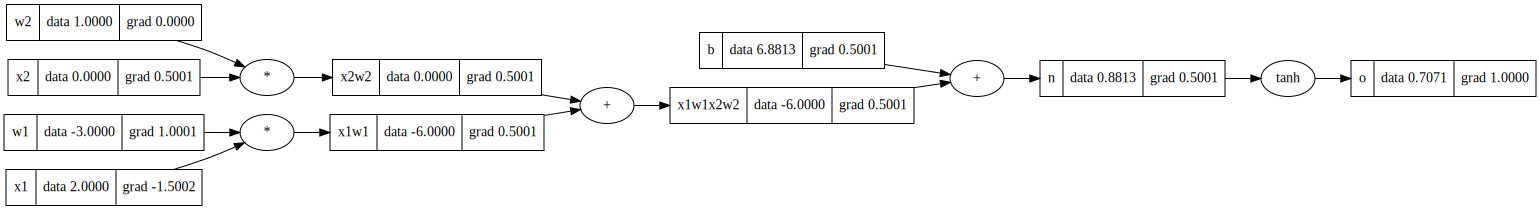

In [77]:
draw_dot(o)

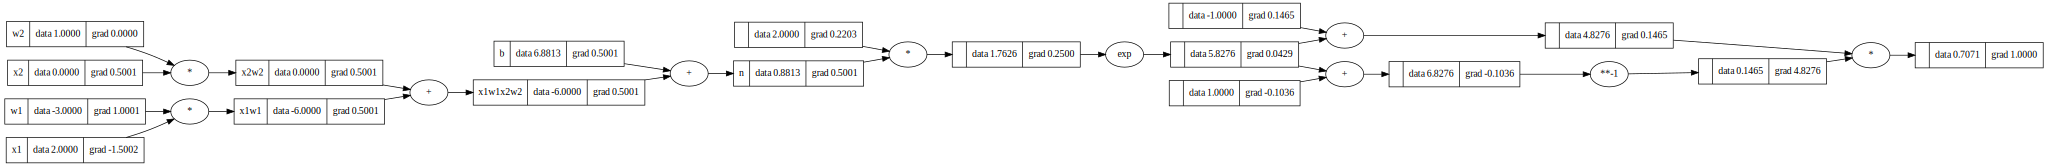

In [78]:
# inputs x1, x2   2D neuron, so two inputs are gonna comin
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# weights of neuron w1, w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias of the neuron
b = Value(6.8813, label="b")

# (x1*w1) + (x2*w2) + b
x1w1 = x1 * w1; x1w1.label = "x1w1";
x2w2 = x2 * w2; x2w2.label = "x2w2";

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1x2w2";

n = x1w1x2w2 + b; n.label="n";
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
# draw_dot(o)
o.backward()
draw_dot(o)

Compare and see difference
1. the same result forward pass works. 0.7071
2. same gradients backward pass

in second, its much more longer graph than tanh one.

Both forward and backward pass works correctly

## takeaway/conclusion of divinding tanh
- got practice of few more expressions and backward passes.
- level of implementation is up to us.
- we can implement backward pass like tiny single/individual + or -, or we can implement tanh which is composite operation bcs its made up of atomic operations like minus, exp, etc.

- all that matters is some kind of input and some kind of an output and output is a function of a input in someway.
- as long as we can do forward pass and backward pass of that operation, it doesnt matter what that operation is and how composite it is.
- If you can write a local gradient, and chain the global gradient and continue backpropagation.
- So design of that function is up to us.
